In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.describe(include='O')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


<Axes: xlabel='price', ylabel='availability'>

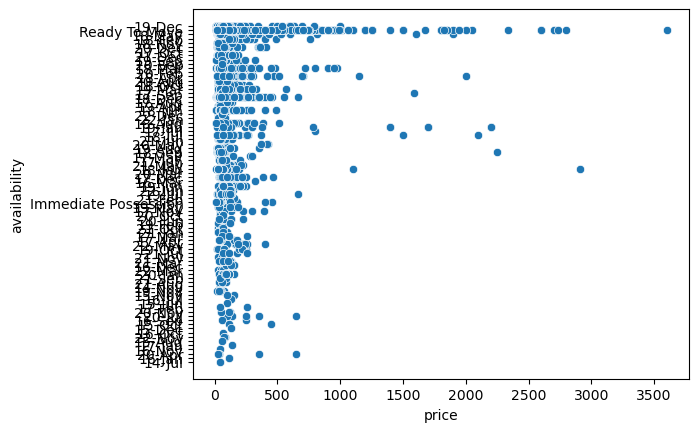

In [7]:
sns.scatterplot(x=df.price, y=df.availability)

<Axes: xlabel='society', ylabel='price'>

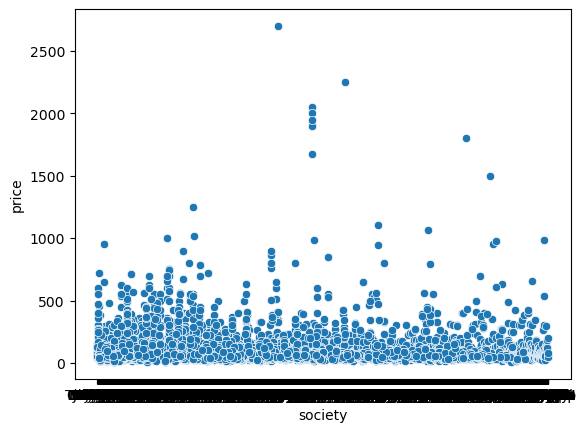

In [8]:
sns.scatterplot(x=df.society, y=df.price)

In [9]:
df.drop(['availability', 'society','area_type'], axis=1, inplace=True)

In [10]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [12]:
df2 = df.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [14]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split()[0]))

In [15]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [16]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [17]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [20]:
def converter(x):
    token = x.split('-')
    if len(token)==2:
        return(float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [21]:
converter('2920')

2920.0

In [22]:
converter('1133 - 1384')

1258.5

In [23]:
df3 = df2.copy()

In [24]:
df3['total_sqft'] = df3['total_sqft'].apply(converter)

In [25]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [26]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [27]:
df4['location'] = df4['location'].apply(lambda x: x.strip())

In [28]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

1017

In [30]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [31]:
len(df4['location'].unique())

1254

In [32]:
df4['location']=df4['location'].apply(lambda x: 'others' if x in location_less_than_10 else x)

In [33]:
len(df4['location'].unique())

238

In [34]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [35]:
df4.shape

(12710, 8)

In [36]:
df5 = df4[~(df4['total_sqft']/df4.bhk<300)]

In [37]:
df5.shape

(12055, 8)

In [39]:
df5.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df5.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out

df6 = remove_outlier(df5)
df6.shape

(9848, 8)

In [44]:
def remove_bhk_outliers(df):
    exclude_indexes = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indexes = np.append(exclude_indexes, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indexes, axis='index')
                
df7 = remove_bhk_outliers(df6)
df7.shape

(5108, 8)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

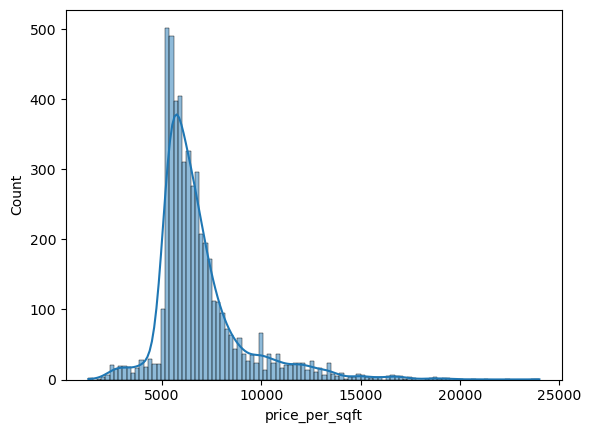

In [46]:
sns.histplot(df7['price_per_sqft'],kde=True)

In [47]:
df7.drop('balcony',axis=1,inplace=True)

In [49]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6450,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8091,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [50]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(5048, 7)

In [51]:
df8.drop(['size','price_per_sqft'], axis=1, inplace=True)

In [53]:
dummies = pd.get_dummies(df8.location)

In [54]:
df9 = pd.concat([df8, dummies.drop('others',axis=1)],axis=1)

In [55]:
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df9.drop('location',axis=1,inplace=True)


In [68]:
df9

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9841,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9842,1095.0,2.0,57.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9843,1256.0,2.0,65.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9844,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
x = df9.drop('price',axis=1)
y=df9.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=8)

In [132]:
X_train.shape

(4038, 217)

In [133]:
X_test.shape

(1010, 217)

In [134]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [135]:
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.8271590472948891

In [136]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [137]:
cv= ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x,y, cv=cv)

array([0.87430856, 0.7615015 , 0.75521336, 0.80387209, 0.7796387 ])

In [141]:
def predict_price(location, sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = sqft 
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
       X[loc_index] = 1
    
    return lr.predict([X])[0]

In [162]:
predict_price ("Yelahanka New Town", 1000,2, 2)

53.8650090478789

# 

In [165]:
predict_price ("Indira Nagar", 1200,2, 3)

166.8784055794561

In [167]:
import pickle
with open('bangalore_house_price_predict.pickle', 'wb') as f:
    pickle.dump(lr,f)

In [168]:
import json
columns= {
    'data_column': [col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))